###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth.

# Coding Assignment: Rocket

The equations of motion for a rocket in purely vertical flight are given by

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 325 \frac{m}{s}$ is the exhaust speed

$C_D = 0.15 $ is the drag coefficient

$m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

![burn rate](./burn.rate.png)

Using Euler's method with a timestep of $\Delta t=0.1s$, create a Python script to calculate the altitude and velocity of the rocket from launch until crash down.  






## Assessment:

To check your answers, you can register for [MAE 6286: Practical Numerical Methods with Python](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about).

1. At time $t=3.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket?

2. What is the maximum speed of the rocket in $\frac{m}{s}$?
    At what time does this occur (in seconds)? 
    What is the altitude at this time (in meters)? 
    
3. What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

4. At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

## Derivation of the rocket equations

In case you are kind of confused about the rocket equations, here we show how to get to them. 

Newton's second law states that the acceleration of the vehicle times its mass is equal to all the forces acting on it. Therefore,

\begin{equation}
(m_s + m_p)\frac{d\bf{v}}{dt}=\sum {\bf F}.
\end{equation}
In the above formula we have assumed that the propellant inside the rocket and the rocket move at the same velocity (in other words, their relative velocity is negligible). 

Two of the external forces acting on the rocket are,

\begin{align}
{\bf F}_g&= (m_s+m_p)\bf{g} \quad (\rm{Gravity}),\\
{\bf F}_d&= - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D \quad (\rm{Drag}).
\end{align}

We also need to consider the force resulting from the ejection of the propellant. During an interval $dt$, the engine of the rocket ejects downwards a mass of propellant given by $\dot m_p dt$. Relative to the rocket, the speed of the ejected burning gas is assumed constant and equal to $v_e$ (the exhaust speed). The momentum variation induced on the exhaust gas by the engine during that interval is therefore, $d{\bf p}_{gas} = \dot m_p {\bf v}_e dt$. Again using Newton's second law we conclude that the force applied by the rocket on the gas is,

\begin{align}
{\bf F}_{rocket\rightarrow gas} = \frac{d{\bf p}_{gas}}{dt} = \dot m_p {\bf v}_e
\end{align}

Using Newton's third law (|action| = |reaction|), the force exerted by the exhaust gas on the rocket is then,

\begin{align}
{\bf F}_{gas\rightarrow rocket} = -{\bf F}_{rocket\rightarrow gas} = -\dot m_p {\bf v}_e
\end{align}

If we collect all the forces acting on the rocket we finally have:

\begin{align}
(m_s + m_p)\frac{d\bf{v}}{dt}=(m_s+m_p){\bf g}- \frac{1}{2} \rho_a \mathbf{v} |v| A  C_D -\dot m_p {\bf v}_e
\end{align}



---

# Résolution du $1^{er}$ Devoir : Le vol d'une fusée

L'approximation d'une équation différentielle par la méthode d'Euler permet de résoudre simplement un ensemble 
d'équations différentielles. Il suffit simplement de connaitre les conditions initiales du problème. 

Ici, les variables à considèrer sont la vitesse verticale ($v_t$), la masse d'essence ($m_p$) et enfin 
la hauteur ($y$). 
Nos 3 équations différentielles sont les évolutions temporelles de ces variables. Respectivement:

\\begin{align}
    u & = \\begin{pmatrix} v_t \\\\ m_p \\\\ y \\end{pmatrix} & f(u) & = \\begin{pmatrix} \frac{-(m_s+m_p)g+\dot{m_p}v_e-\frac12\rho v_t|v_t|AC_D}{m_s+m_p} \\\\ -dm_p \\\\ v_t \\end{pmatrix}
\\end{align}

Les variables utilisées sont les mêmes que dans l'énoncé du travail, nous avons juste modifié le nom de la variable vitesse $v_t$ et la variable altitude $y$. Nous avons décidé d'inclure la variable $m_p$ dans notre équation $u$ pour répondre efficacement à la question 1 : nous pourrions ainsi calculer la valeur du carburant restant et la verifier en cherchant la valeur de $m_p$ dans $u$ au temps désiré.

In [37]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Nous développons ici la fonction $f(u)$ qui sera utilisée dans la fonction euler_step(u, f, dt)

In [11]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
    
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    v_t = u[0]
    mp = u[1]
    y = u[2]
    return numpy.array([-g+dmp*ve/(ms+mp)-rho*v_t*abs(v_t)*A*C_D/(2*(ms+mp)),
                      -dmp,
                      v_t])

In [12]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    return u + dt * f(u)

La fonction index_ground(u) nous permet de rechercher,à l'aide de la fonction numpy.where(), l'index du moment où l'altitude de la fusée devient négative. Si jamais l'altitude de la fusée ne devient jamais négative, ce qui correspond au moment où la fusée touche le sol, la fonction envoi un message nous faisant comprendre que la fusée n'a pas encore touché le sol.

Nous avons pris soin d'incruster dans la fonction une méthode pour modifier la valeur de l'altitude après l'impact avec le sol. Ces valeurs précédement négative n'avaient pas de sens physique et nous avons donc décidé de les modifier pour correspondre à l'altitude intiale de la fusée, le sol situé à 0m d'altitude.

In [41]:
def index_ground(u):
    """Returns the index of element of y where altitude becomes negative. For physics consistency the function rewrite
    the altitude's value of the rocket after it does hit the ground and set them to 0 since the rocket cannot go underground.
    
    Parameters
    ----------
    u : array of float
        complete solution of the rocketship trajectory.
    
    Returns
    -------
    index : float
        the index value where the rocketship's altitude becomes negative
    """
    
    idx_negative = numpy.where(u[:,2]<0.0)[0]  # extract the index where the rocketship's altitude becomes negative

    if len(idx_negative)==0:
        index = N-1
        print ('The Rocket has not reached the ground yet!')
    else:
        index = idx_negative[0]
    
    for i in range(len(idx_negative)): # altitude's values after index are negative and are so rewritten as zero
        u[i+index,2]=0
        
    return index

Toutes les constantes expliquées dans l'énoncé du travail prennent leur valeur ici, ainsi que les valeurs initiales des variables et de la variation de combustible, nécessaire pour la méthode d'Euler.

In [42]:
# model parameters:
g = 9.81            # gravity in m s^{-2}
v_t = 0.0           # initial velocity in m s^{-1}
C_D = 0.15          # drag coefficient
rho = 1.091         # average air density in kg m^{-3}
ms = 50             # weight of the rocket shell in kg
r = 0.5             # radius of the rocket in m
A = numpy.pi*r**2   # maximum cross sectional area of the rocket in m^{2}
ve = 325            # exhaust speed in m s^{-1}
mp = 100            # weight of the rocket propellant in kg

### set initial conditions ###
v0 = v_t            # starting velocity
y0 = 0              # initial altitude
mp0 = mp            # initial weight of the rocket propellant in kg
dmp = 20            # combustion rate (kg/s)

In [22]:
T = 40                             # final time
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps
timefuelwaste = mp0/dmp            # time of fuel consumption
Z = timefuelwaste/dt               # number of steps after wich there is no more rocket propellant
t = numpy.linspace(0, T, N)        # time discretization

# initialize the array containing the solution for each time-step
u = numpy.empty((N, 3))
u[0] = numpy.array([v0, mp0, y0])  # fill 1st element with initial values

# time loop - Euler method with the given condition on the fuel consumption
for n in range(N-1):
    if n >= Z :
        dmp = 0
    u[n+1] = euler_step(u[n], f, dt)

In [23]:
index = index_ground(u)

Etant donné que nous avons pas reçu de message "The Rocket has not reached the ground yet!" il semble que notre roquette a bien touché le sol.

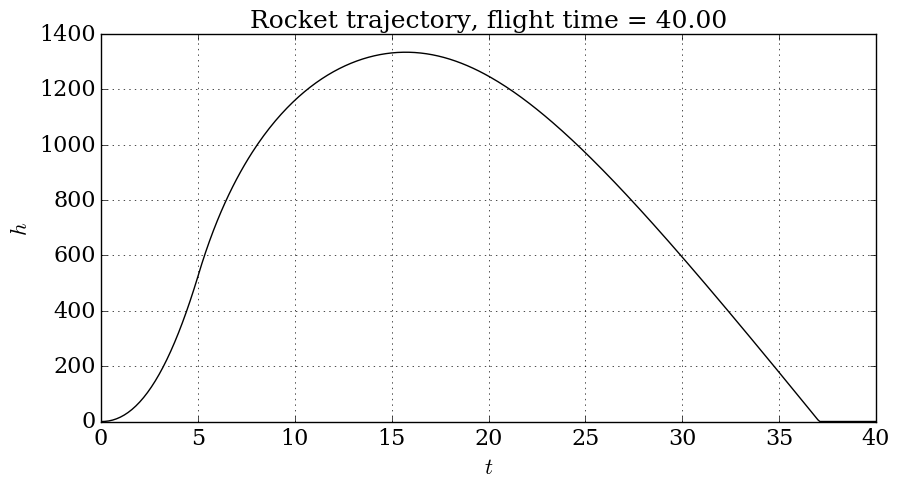

In [43]:
# get the rocket's position with respect to the time
y = u[:,2]
mp = u[:,1]
# visualization of the path
pyplot.figure(figsize=(10,5))
pyplot.grid(True)
pyplot.xlabel('$t$')
pyplot.ylabel('$h$')
pyplot.title('Rocket trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(t,y, color='k');

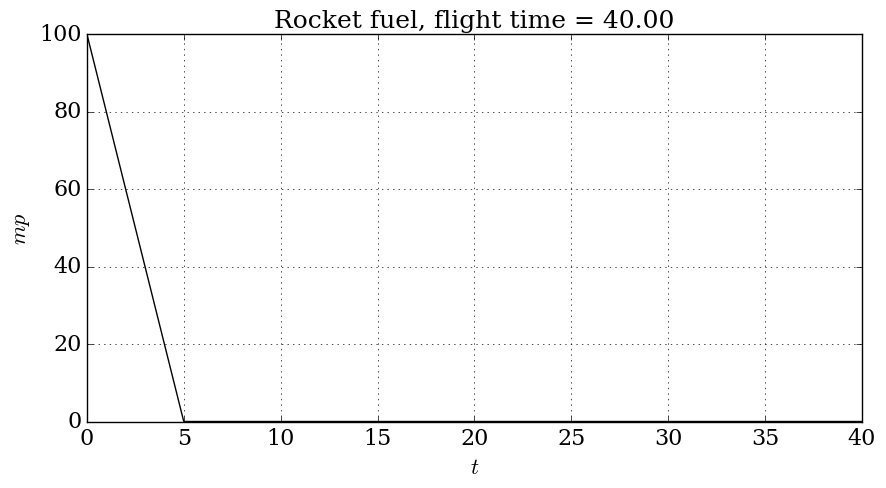

In [44]:
# visualization of the path
pyplot.figure(figsize=(10,5))
pyplot.grid(True)
pyplot.xlabel('$t$')
pyplot.ylabel('$mp$')
pyplot.xlim(0.0,T)
pyplot.ylim(0.0,mp0)
pyplot.title('Rocket fuel, flight time = %.2f' % T, fontsize=18)
pyplot.plot(t,mp, color='k');

### At time $t=3.2s$ , what is the mass (in kg) of rocket propellant remaining in the rocket?

Pour les 3.2 sec de fuel on peut les faire directement par calcul (mp0-dmp.temps) et vérifier que nous avons la même donnée dans notre simulation.

In [26]:
mp0-20*3.2

36.0

Nous cherchons donc la valeur de mp après 3,2 secondes, donc la 32ème valeur de mp dans u

In [27]:
print(u[32,1])

36.0


### What is the maximum speed of the rocket in $m.s^{-1}$? At what time does this occur (in seconds)? What is the altitude at this time (in meters)?

Il suffit de chercher où est la valeur maximale de u[:,0], la composante vitesse de u

In [28]:
numpy.where(u[:,0]==max(u[:,0]))[0][0]

50

Ce qui nous dit que la valeur maximale est atteinte à la 50ème valeur, qui représente donc 5 secondes. Nous cherchons après la valeur correspondante de l'altitude, deuxième composante de u.

In [29]:
u[50,2]

523.52283429184763

### What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

In [30]:
p = max(u[:,2])
print(p)

1334.18294543


In [49]:
?numpy.where

In [31]:
q = numpy.where(u[:,2]==p)[0]
print(q)
q[0]*dt

[157]


15.700000000000001

### At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in msms) at time of impact?

In [35]:
print(index)
print(u[370,2])
print(u[371,2])

371
6.13901004188
0.0


In [34]:
print(u[index,0])
print(index*dt)

-86.0068349838
37.1
